# This is for testing only

# Import Libraries

In [2]:
# add more if needed

# data loading
from pandas.io.json import json_normalize
import json
import pandas as pd
import os, random

# data inspection
from collections import Counter

# preprocessing
import string
import nltk

# computations
import numpy as np
import math

# visualization
import matplotlib
from matplotlib import pyplot as plt
from pprint import pprint

# data saving
import pickle

# Load Data

In [3]:
file_path = "data/winemag-data-130k-v2.json"

with open(file_path) as f:
    data = json.load(f)
    
dataset = pd.DataFrame.from_dict(json_normalize(data), orient='columns')

In [4]:
dataset.head(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,None,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,None,None,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",None,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,None,Alexander Peartree,None,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# Inspect Data

In [5]:
varieties = dataset['variety'].tolist()

In [6]:
wine_count = Counter(varieties)

In [7]:
filtered_keys = []

for key, item in wine_count.items():
    if item < 1300:
        filtered_keys.append(key)
        
print(len(filtered_keys))

685


# Preproces Data

## Example Code

In [8]:
old_len = len(dataset)
print(old_len)

129971


In [17]:
idx = 0
indices = []
for v in varieties:
    if v in filtered_keys:
        indices.append(idx)
    idx += 1
        
        
print(len(dataset))

129971


In [22]:
ds2 = dataset.drop(dataset.index[indices])
print(len(dataset) - len(indices))

98008


23


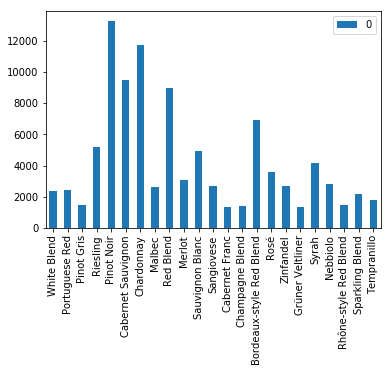

In [39]:
varieties = ds2['variety'].tolist()
variety_count = Counter(varieties)
print(len(variety_count))
countplot = pd.DataFrame.from_dict(variety_count,orient='index')
countplot.plot(kind='bar')

In [26]:
len(ds2v)

NameError: name 'ds2v' is not defined

In [4]:
descriptions = dataset['description'].tolist()

In [5]:
print(descriptions[0])

Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.


In [7]:
test_string = descriptions[0]

### Remove Punctuation

In [8]:
translator = str.maketrans('', '', string.punctuation)
stripped_test_string = test_string.translate(translator)

### Make Lowercase

In [16]:
stripped_test_string = stripped_test_string.lower()

### tokenize

In [17]:
tokens = nltk.word_tokenize(stripped_test_string)

In [18]:
print(tokens)

['aromas', 'include', 'tropical', 'fruit', 'broom', 'brimstone', 'and', 'dried', 'herb', 'the', 'palate', 'isnt', 'overly', 'expressive', 'offering', 'unripened', 'apple', 'citrus', 'and', 'dried', 'sage', 'alongside', 'brisk', 'acidity']


## Real Deal